# Project: Investigate a Dataset
### Jenny Hu

## Introduction
***
For this project, I will be analyzing the "TMDb movie data" dataset provided by [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata). This dataset contains information on 10,000 movies collected from The Movie Database(TMDb). The information that interests me in this dataset includes the budget and revenue of each movie, user ratings and popularity, as well as genre and etc. 

This prompts me to ask the following questions:
- Which movie has the highest profit and which one has the lowest?
- Do movies with higher budget generate more revenue?
- How does user ratings affect profit?
- How does profit change over the years?
- Which directors generate the highest profit?
- Which movie genre generate the highest profit?

Ultimately, I want to know what it takes to create a profitable movie.
***

## Getting Organized

In [102]:
# Import necessary modules for this report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Visualize plots inline for this document 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load CSV data into DataFrame

In [169]:
# Read csv into Pandas Dataframe and store in dataset variable
movies_df = pd.read_csv('tmdb-movies.csv')

# Show information on the dataset
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Data Wrangling
***
> ### General information
- There are 10866 movie entires (rows)
- There are 21 columns
- There are missing values in some of the columns
- Since we are interested on how certain movie features affect budget/revenue, we will select entries that has completed information for both budget and revenue

> ### Steps to clean up the data
- Remove any duplicates in the dataset
- Keey columns that are necessary for the analysis and remove the others
- Remove rows with 0 or NaN values for budget and revenue
- Create a column with profit (revenue - budget)
***

In [170]:
# Remove Duplicates
movies_df.drop_duplicates(inplace=True)

There is now 10864 entires remaining, which means 1 duplicate row was removed.

In [171]:
# Subset data with only the columns that we are interested in
# Make a list of columns to be deleted
remove = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 
          'homepage', 'cast', 'keywords', 'tagline', 'overview', 'runtime',
          'production_companies', 'release_date']

# Remove the columns and keep the ones we want
movies_df2 = movies_df.drop(remove,1)
movies_df2.head()

,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015


In [172]:
# Remove rows with missing values for budget and revenue or if they equal to 0
columns = ['budget','revenue']
movies_df2[columns] = movies_df2[columns].replace(0, np.NaN)
movies_df2.dropna(subset = columns, inplace=True)

# Check rows and columns of the clean dataset
movies_df2.shape

(3854, 8)

After removing all rows with budget or revenue that is equalled to 0, there is only 3853 entries remaining (minus the column label).

In [173]:
# Create a column for profit
# Profit = Revenue - Budget
def calc_profit (data):
    revenue = data['revenue']
    budget = data['budget']
    data.insert(2, 'profit', revenue - budget)
    return data

# Create a new column for profit and check that it is added correctly
calc_profit(movies_df2)
movies_df2.head(5)

,budget,revenue,profit,original_title,director,genres,vote_count,vote_average,release_year
0,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,190000000.0,1.506249e+09,1.316249e+09,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015


The profit column is now added to the dataset. 

## Data Analysis
***
> ### Question 1: Which movie has the highest profit and which one has the lowest?

In [174]:
# Write a function to determine the movies with the highest and lowest profit
def max_min_profit(data):
    '''This function displays information on movie with the highest profit and the movie with the lowest profit'''
    profit = data['profit']
    max_profit = profit.idxmax()
    max_info = pd.DataFrame(data.loc[max_profit])
    min_profit = profit.idxmin()
    min_info = pd.DataFrame(data.loc[min_profit])
    
    return pd.concat([max_info, min_info], axis=1)

# The maximum and minimum profit movie information is displayed
max_min_profit(movies_df2)

,1386,2244
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
profit,2.54451e+09,-4.13912e+08
original_title,Avatar,The Warrior's Way
director,James Cameron,Sngmoo Lee
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
vote_count,8458,74
vote_average,7.1,6.4
release_year,2009,2010


The above information shows that Avatar is the highest grossing movie, reaching a shocking \$2,544,505,847 of profit. On the contrary, The Warrior's Way unfortunately is at a \$413,912,431 deficit as the budget greatly exceeds the revenue of this movie. 

> ### Question 2: Do movies with higher budget generate more revenue?

,budget,revenue
budget,1.000000,0.688556
revenue,0.688556,1.000000


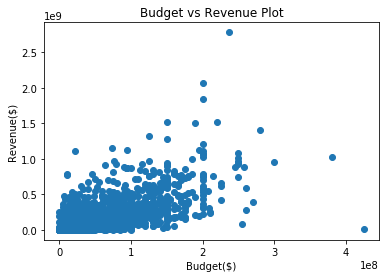

In [175]:
# Scatterplot between budget and revenue to examine trend
plt.scatter(movies_df2['budget'],movies_df2['revenue'])
plt.xlabel('Budget($)')
plt.ylabel('Revenue($)')
plt.title('Budget vs Revenue Plot')

# Pearson correlation
movies_df2[columns].corr(method='pearson')

Some observations of this plot:
- Budget and revenue is positively correlated (r=0.69)
- The correlation is decent but not very strong

> ### Question 3: How does user ratings affect profit?

,profit,vote_average
profit,1.000000,0.259435
vote_average,0.259435,1.000000


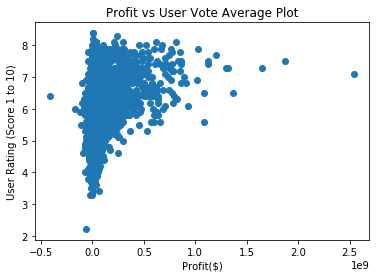

In [176]:
# Scatterplot between budget and revenue to examine trend
plt.scatter(movies_df2['profit'],movies_df2['vote_average'])
plt.xlabel('Profit($)')
plt.ylabel('User Rating (Score 1 to 10)')
plt.title('Profit vs User Vote Average Plot')

# Pearson correlation
vote_profit = ['profit','vote_average']
movies_df2[vote_profit].corr(method='pearson')

Some observations of this plot:
- There is no obvious correlation between vote average and profit
- Most datapoints fall between \$0 to \$50,000,000 of profit and the scores range between 3 to 9
- The correlation coeffecient r = 0.26, this shows very weak correlation

In [177]:
# Check vote count and vote average information  
vote_info = movies_df2['vote_count'].describe()
score_info = movies_df2['vote_average'].describe()
print(pd.concat([vote_info,score_info], axis=1))

        vote_count  vote_average
count  3854.000000   3854.000000
mean    527.720291      6.168163
std     879.956821      0.794920
min      10.000000      2.200000
25%      71.000000      5.700000
50%     204.000000      6.200000
75%     580.000000      6.700000
max    9767.000000      8.400000


The above information for vote_average(scores) does match with the plot showing an averge score around 6 and with minimum socre at around 2.2, maximum score at 8.4. However, There is a huge range of vote counts for different movies as the minimum count is 10 and the maximum count is 9767 with an overall average count of 527. The large discrepency in vote counts between movies may explain why there is no correlation between user rating and profit. 

> ### Question 4: How does profit change over the years?

Text(0.5,1,'Annual Change in Profit')

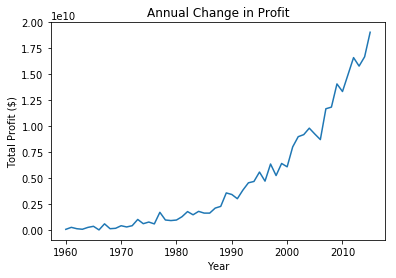

In [178]:
# Group the data by release year and then sum up the profit for each year
total_annual_profit = movies_df2.groupby('release_year')['profit'].sum()

# Plot the change in annual profit over years
plt.plot(total_annual_profit)
plt.xlabel('Year')
plt.ylabel('Total Profit ($)')
plt.title('Annual Change in Profit')

Text(0.5,1,'Annual Change in Average Profit')

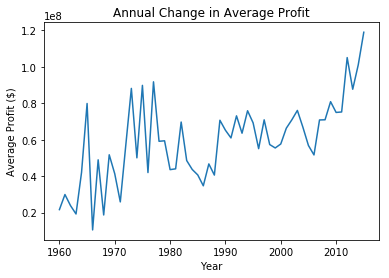

In [179]:
# Group the data by release year and then calculate the average profit for each year
total_avg_profit = movies_df2.groupby('release_year')['profit'].mean()

# Plot the change in average profit over years
plt.plot(total_avg_profit)
plt.xlabel('Year')
plt.ylabel('Average Profit ($)')
plt.title('Annual Change in Average Profit')

Some observations of the plots:
- Both plots show an increasing profit over years
- The total annual profit has a steady increase over the last 50 years
- The average annual profit also increases over the years but there is more drastic fluctuations, which is expected

> ### Question 5: Which directors generate the highest profit?

Text(0,0.5,'Director')

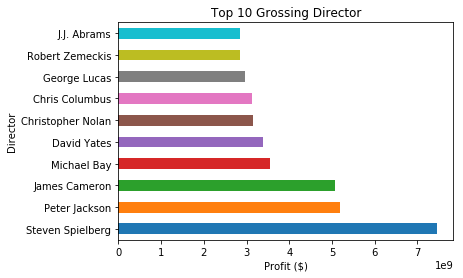

In [358]:
# Group the data by release year and then sum up the profit for each year
dir_df = movies_df2 
dir_df.dropna(subset=['director'], inplace=True)
dir_profit = dir_df.groupby('director')['profit'].sum().reset_index()
dir_profit.sort_values(by='profit', ascending=False, inplace=True)

# Create a slice of the top 10 directors with the highest profits for plotting
top_dir = dir_profit[:10]

# Bar plot for the top 10 grossing directors
plot = top_dir.plot.barh(x='director', y='profit', legend=None, title='Top 10 Grossing Director')
plot.set_xlabel('Profit ($)')
plot.set_ylabel('Director')

The top 10 grossing directors are listed in the bar plot with Steven Spielberg in the first place at \$7.5 billion dollars.

> ### Question 6: Which movie genre generate the highest profit?

In [359]:
# Determine the unique genres in the dataset and the number of movies in each genre
def extract(column):
    '''This function determines the number of movies under each inidivual genre
    by separating all the genres with | and then string split at |'''
    data = movies_df2[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

# Create dataframe that stores all the unique genres and corresponding movie counts
genre_list = extract('genres')
genre_list = pd.DataFrame(genre_list).reset_index()
genre_list.columns = ['genres','count']

In [356]:
# Create a subset of the dataset with genres and profit
col = ['genres','profit']
genre_df = movies_df2[col]

# Create a list of genres that has more than 10 movie counts
top_genres = ['Drama', 'Comedy', 'Thriller','Action', 'Adventure', 'Romance', 
              'Crime', 'Science Fiction', 'Horror', 'Family','Fantasy', 
              'Mystery','Animation','Music', 'History', 'War', 'Western',
              'Documentary', 'Foreign']

# Calculate the total amount of profit for each movie genre and sort the values in decreasing order
genre_list = genre_df[genre_df.genres.isin(top_genres)].groupby('genres').profit.sum().reset_index()
genre_list.sort_values(by='profit', ascending=False, inplace=True)

Text(0,0.5,'Genres')

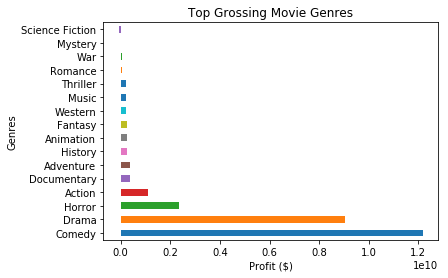

In [352]:
# Bar plot for the top 10 grossing directors
plot = genre_list.plot.barh(x='genres', y='profit', legend=None, title='Top Grossing Movie Genres')
plot.set_xlabel('Profit ($)')
plot.set_ylabel('Genres')

The plot above shows the total profit from each movie genre. Comedy is by far the most profitable movie genre, reaching a total profit of \$12 billion dollars.

## Conclusion
***
After answering all the questions that I have discussed in the introduction, I definitely found some interesting results. Out of curiosity, I first performed a comparison between the highest grossing movie (Avatar) and the lowest grossing movie (The Warrior's Way). From this I found that Avatar has a much higher vote count and The Warrior's Way had a much high budget (almost doubled). However, it is definitely not enough by just comparing two movies. Here is a summary of the findings after some more detailed analysis, which can potentially be used as a criteria for creating a profitable movie:

1. Budget is postively correlated with revenue, thus higher budget may generate more revenue
2. View ratings does not have a strong correlation with profit, but it's good to note that high profit movies have a higher rating than average
3. There is a steady increase in total annual profit over the last 50 years. So if you want to make a movie, now is better than ever
4. The movie directors for a likely profitable movie are: Steven Spielberg, Peter Jackson, James Cameron, Michael Bay, David Yates, Christopher Nolan
5. The movie genres for a likely profitable movie are: Comedy, Drama, Horror, Action, Documentary, Adventure

### Limitations:
- This is not a 100% guaranteed profitable criteria for a movie because there are many other aspects involved in creating a successful movie that are not considered in this analysis (such as marketing, audiences' taste is subjected to change depending on trends and etc)
- There is not specified currency in this dataset for budget and revenue, thus the movie earnings may be in different currencies which will change the results of the analysis
- The dataset may not be up to date and for this analysis we can not confirm how reliable or accurate the information is. 

Nevertheless, this was an interesting project that added many movies to my to-watch list. 
***